# 深度卷积网络

常见的结构如下：
![image](https://wx1.sinaimg.cn/large/69d4185bly1fyejbk0x49j20j10673ze.jpg)

卷积网络的关键有如下三点：
- 局部视野
- 权重共享
- 池化

在 keras 中卷积层可以如下创建：
```python
Conv2D(32, (3, 3), input_shape=(256, 256, 3))
# 或
Conv2D(32, kernel_size=3, input_shape=(256, 256, 3))
```
即将一个 3X3 的核用在输入为大小为 256 × 256 深度为 3 的图片上，输出为 32：
![image](https://ws1.sinaimg.cn/large/69d4185bly1fyejkhy44lj20ix090dg7.jpg)


池化层的创建如下：
```python
MaxPooling2D(pool_size=(2, 2))
```
![image](https://ws1.sinaimg.cn/large/69d4185bly1fyejlqwwjnj209s05ydg2.jpg)

# LeNet

LeNet 的结构如下：
![image](https://wx2.sinaimg.cn/large/69d4185bly1fyejovznrdj20iy07jwfc.jpg)

In [4]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib. pyplot as plt

In [23]:
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        # CONV => RELU => POOL
        model.add(Conv2D(20, kernel_size=5, padding='same', input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # CONV => RELU => POOL
        model.add(Conv2D(50, kernel_size=5, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # Flatten => RELU
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))
        # softmax
        
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        return model

In [25]:
### 数据准备
# network and training
NB_EPOCH = 20
BAICH_SIZE = 128
VERBOSE = 1
OPITMIZER = Adam()
VALIDAIION_SPLIT=0.2
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10 # number of outputs = number of digits
INPUI_SHAPE = (IMG_ROWS, IMG_COLS, 1)

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
K.set_image_dim_ordering("tf")
# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test. astype('float32')
X_train /= 255
X_test /= 255

#wen eed a 60Kx[28x28x1]shape as input to the CONVNEI
X_train = X_train[:, :, :, np.newaxis]
x_test = X_test[:, :, :,np.newaxis]

print(X_train.shape[0], 'train samples')
print(X_test. shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# initialize the optimizer and model
model = LeNet.build(input_shape=INPUI_SHAPE, classes=NB_CLASSES)
model.compile(OPITMIZER, loss="categorical_crossentropy", metrics=["accuracy"] )

history = model.fit(X_train, y_train,
                    batch_size=BAICH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDAIION_SPLIT)

60000 train samples
10000 test samples
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 90s 2ms/step - loss: 0.1843 - acc: 0.9425 - val_loss: 0.0627 - val_acc: 0.9810
Epoch 2/20
48000/48000 [==============================] - 88s 2ms/step - loss: 0.0492 - acc: 0.9842 - val_loss: 0.0418 - val_acc: 0.9879
Epoch 3/20
48000/48000 [==============================] - 84s 2ms/step - loss: 0.0313 - acc: 0.9901 - val_loss: 0.0429 - val_acc: 0.9879
Epoch 4/20
48000/48000 [==============================] - 80s 2ms/step - loss: 0.0231 - acc: 0.9923 - val_loss: 0.0356 - val_acc: 0.9899
Epoch 5/20
48000/48000 [==============================] - 81s 2ms/step - loss: 0.0187 - acc: 0.9937 - val_loss: 0.0394 - val_acc: 0.9887
Epoch 6/20
48000/48000 [==============================] - 89s 2ms/step - loss: 0.0140 - acc: 0.9951 - val_loss: 0.0402 - val_acc: 0.9890
Epoch 7/20
48000/48000 [==============================] - 87s 2ms/step - loss: 0.0124 - a

10000/10000 [==============================] - 6s 597us/step
Iest score: 0.0335120748671
Iest accuracy: 0.9921
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


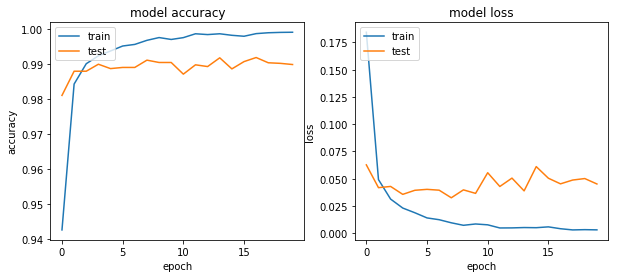

In [33]:
score = model.evaluate(x_test, y_test, verbose=VERBOSE)
print ("Iest score:", score[0])
print('Iest accuracy:', score[1])

# list all data in history
print (history.history.keys())
# summarize history for accuracy
fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[0].plot(history.history['acc'])
axs[0].plot(history.history['val_acc'])
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='upper left')

# summarize history for loss
axs[1].plot(history .history['loss'] )
axs[1].plot(history .history['val_loss'] )
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel ('epoch' )
axs[1].legend([ 'train', 'test'] , loc='upper left')
plt.show()

训练数据对精度有很大的影响，下面是多层感知机和卷积神经网络在不同数据下的精度对比：
![image](https://wx2.sinaimg.cn/large/69d4185bly1fyelhi3hjbj20ge0913z2.jpg)

# CIFAR 识别

In [49]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
# CIFAR_ 10 is a set of б0K images 32x32 pixels on 3 channels
IMG_CHANNELS  = 3

IMG_ROWS = 32
IMG_COLS = 32
#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print ('X_train shape: ', X_train.shape )
print (X_train.shape[0], 'train samples')
print (X_test.shape[0], 'test samples')

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES )
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
# float and normalization 
X_train = X_train. astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [50]:
def plot_loss(history):
    # list all data in history
    print (history.history.keys())
    # summarize history for accuracy
    fig, axs = plt.subplots(1,2, figsize=(10,4))
    axs[0].plot(history.history[ 'acc'])
    axs[0].plot (history.history['val_acc'])
    axs[0].set_title('model accuracy')
    axs[0].set_ylabel('accuracy')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    axs[1].plot(history .history['loss'] )
    axs[1].plot(history .history['val_loss'] )
    axs[1].set_title('model loss')
    axs[1].set_ylabel('loss')
    axs[1].set_xlabel('epoch' )
    axs[1].legend(['train', 'test'] , loc='upper left')
    plt.show()

## 普通方法

In [51]:
# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                   input_shape= (IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten() )
model.add(Dense(512) )
model.add(Activation('relu') )
model.add(Dropout(0.5) )
model.add(Dense(NB_CLASSES) )
model.add(Activation( 'softmax') )

# train
model.compile(OPTIM, loss='categorical_crossentropy', metrics=['accuracy'] )
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, 
          epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,
          verbose=VERBOSE )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 62s 2ms/step - loss: 1.6972 - acc: 0.3940 - val_loss: 1.4264 - val_acc: 0.4941
Epoch 2/20
40000/40000 [==============================] - 63s 2ms/step - loss: 1.3630 - acc: 0.5165 - val_loss: 1.2514 - val_acc: 0.5556
Epoch 3/20
40000/40000 [==============================] - 62s 2ms/step - loss: 1.2280 - acc: 0.5662 - val_loss: 1.1442 - val_acc: 0.6074
Epoch 4/20
40000/40000 [==============================] - 59s 1ms/step - loss: 1.1369 - acc: 0.5988 - val_loss: 1.1007 - val_acc: 0.6191
Epoch 5/20
40000/40000 [==============================] - 65s 2ms/step - loss: 1.0631 - acc: 0.6252 - val_loss: 1.1251 - val_acc: 0.6063
Epoch 6/20
40000/40000 [==============================] - 68s 2ms/step - loss: 1.0003 - acc: 0.6513 - val_loss: 1.0637 - val_acc: 0.6348
Epoch 7/20
40000/40000 [==============================] - 61s 2ms/step - loss: 0.9491 - acc: 0.6699 - val_loss: 1.0172 - val_acc

10000/10000 [==============================] - 4s 376us/step
Test score:  1.11880475225
Test accuracy:  0.6728
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


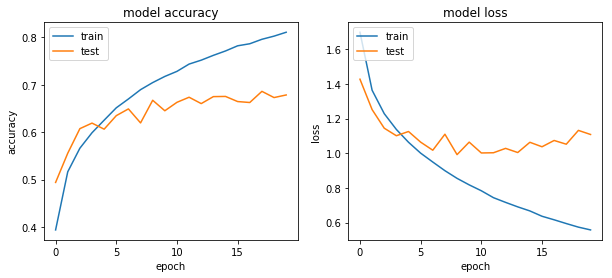

In [58]:
score = model.evaluate (X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE )
print ("Test score: ", score[0] )
print ('Test accuracy: ' , score[1])

# 绘图
plot_loss(history)

#save
model_json = model.to_json()
open('./models/ciflar10_architecture.json', 'w').write(model_json)
# And the weights learned by our deep network on the training set
model.save_weights('./models/cifar10_weights .h5' , overwrite=True)

## 卷积方法

In [63]:
model = Sequential()
model.add(Conv2D(32, (3, 3) , padding='same' ,
                  input_shape= (IMG_ROWS, IMG_COLS, IMG_CHANNELS) ) )
model.add(Activation('relu') )
model.add(Conv2D(32, (3, 3), padding='same') )
model.add(Activation( 'relu') )
model.add(MaxPooling2D (pool_size=(2, 2) ) )
model.add(Dropout (0.25) )
model.add(Conv2D(64, (3, 3), padding='same') )
model.add(Activation('relu') )
model.add(Conv2D(64, 3, 3) )
model.add(Activation('relu') )
model.add(MaxPooling2D (pool_size=(2, 2)) )
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

# train
model.compile(OPTIM, loss='categorical_crossentropy', metrics=['accuracy'] )
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, 
          epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,
          verbose=VERBOSE )

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()


Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 219s 5ms/step - loss: 1.8119 - acc: 0.3458 - val_loss: 1.4779 - val_acc: 0.4700
Epoch 2/20
40000/40000 [==============================] - 213s 5ms/step - loss: 1.3552 - acc: 0.5201 - val_loss: 1.1057 - val_acc: 0.6082
Epoch 3/20
40000/40000 [==============================] - 218s 5ms/step - loss: 1.1270 - acc: 0.6048 - val_loss: 0.9637 - val_acc: 0.6641
Epoch 4/20
40000/40000 [==============================] - 199s 5ms/step - loss: 0.9872 - acc: 0.6530 - val_loss: 0.8796 - val_acc: 0.6945
Epoch 5/20
40000/40000 [==============================] - 231s 6ms/step - loss: 0.8953 - acc: 0.6882 - val_loss: 0.8235 - val_acc: 0.7138
Epoch 6/20
40000/40000 [==============================] - 208s 5ms/step - loss: 0.8202 - acc: 0.7172 - val_loss: 0.9568 - val_acc: 0.6896
Epoch 7/20
40000/40000 [==============================] - 220s 5ms/step - loss: 0.7576 - acc: 0.7391 - val_loss: 0.7720 - 

10000/10000 [==============================] - 16s 2ms/step
Test score:  0.748820310783
Test accuracy:  0.7639
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


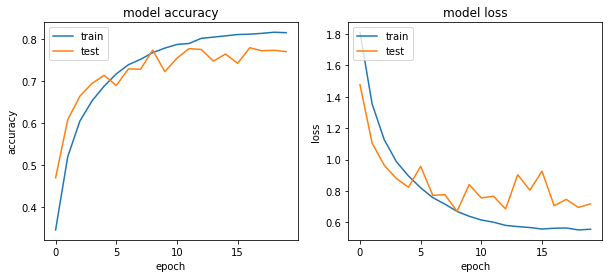

In [64]:
score = model.evaluate (X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE )
print ("Test score: ", score[0] )
print ('Test accuracy: ' , score[1])

# 绘图
plot_loss(history)

## 数据增强

通过数据增强也可以用于提升网络的表现，keras 提供了多种数据增强方法，如：旋转、尺度、水平/垂直翻转、缩放、通道偏移等等：
```python
datagen=ImageDataGenerator(rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest')
datagen.fit(X_train)
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                   samples_per_epoch=X_train.shape[0],epochs=NB_EPOCH)
```

## 预测

```python
import numpy as np
import scipy.misc
from keras.models import model_from_json
from keras.optimizers import SGD

#load model
model_architecture = 'cifar1O_architecture.json '
model_weights = 'cifar1O_weights.h5 '
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)

#load images
img_names = ['cat-standing.jpg', 'dog. jpg']
imgs = [np.transpose(scipy.misc.imresize(scipy.misc.imread (img_name),  (32, 32)), 
                     (1, 0, 2)).astype('float32') 
        for img_name in img_names ]
imgs = np.array(imgs) / 255

# train
optim = SGD()
model.compile(optim, loss='categorical_ crossentropy' , metrics=[ 'accuracy'] )
# predict
predictions = model.predict_classes(imgs)
print(predictions )
```

# 提取特征创建模型

从 VGG16 中提取特征，进行模型搭建。
```
Now you might wonder why we want to extract the features from an intermediate layer in a DCNN. The key intuition is that, as the network learns to classify images into categories, each layer learns to identify the features that are necessary to do the final classification. Lower layers identify lower order features such as color and edges, and higher layers compose these lower order feature into higher order features such as shapes or objects. Hence the intermediate layer has the capability to extract important features from an image, and these features are more likely to help in different kinds of classification. This has multiple advantages. First, we can rely on publicly available large-scale training and transfer this learning to novel domains. Second, we can save time for expensive large training. Third, we can provide reasonable solutions even when we don't have a large number of training examples for our domain. We also get a good starting network shape for the task at hand, instead of guessing it.
```

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

# pre-built and pre-trained deep learning VGG16 mode l
base_model = VGG16 (weights=' imagenet', include_top=True)

for i, layer in enumerate (base_model.layers) :
    print(i, layer.name, layer.output_shape)

# extract features from block4_ pool block
model = Model(input=base_model.input,
             output=base_model.get_layer('block4_pool').output)
img_path = './images/cat01.jpg'
img = image.load_img (img_path, target_size=(224, 224))
x = image.img_to_array (img)
x = np.expand_dims(x, axis=0)
x = preprocess_input (x)
# . get the features from this block
features = model.predict (x)

# 迁移学习

```
Transfer learning is a very powerful deep learning technique which has more applications in different domains. The intuition is very simple and can be explained with an analogy. Suppose you want to learn a new language, say Spanish; then it could be useful to start from what you already know in a different language, say English. Following this line of thinking, computer vision researchers now commonly use pre-trained CNNs to generate representations for novel tasks, where the dataset may not be large enough to train an entire CNN from scratch. Another common tactic is to take the pretrained ImageNet network and then to fine-tune the entire network to the novel task.
```
以 Inception-V3为例：

```python
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image .
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_ model. output
x = GlobalAveragePooling2D()(x) # let 's add a fully-connected layer as first layer
x = Dense(1024, activation='relu')(x) # and a logistic layer with 200 classes as last layer
predictions = Dense(200, activation='softmax')(x) # model to train
model = Model(input=base_model.input, output=predictions)

# that is, freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False
    
# compile the model(should be done after setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='catergorical_crossentropy')
```

或者是如下冻结策略：
```python
# we chose to train the top 2 inception blocks,that is ,
# we will freeze the first 172 layers and unfreeze the rest
for layer in model.layers[:172]:
    layer.trainable=False
for layer in model.layers[172:]:
    layter.trainable=True
    
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(SGD(lr=0.001, momentun=0.9), loss='categorical_crossentropy')

# we train our model again(this time fine-tuning the top 2 inception blocks)
# alongside the top dense layers
model.fit_generator(...)
```